Convert immoscout html text (which is already saved) to a pandas dataframe. 

In [1]:
import pandas as pd
import numpy as np
from SingleAptListing_to_table import SingleAptListing_to_table

In [2]:
df = pd.DataFrame()

In [3]:
num_pages = 28
for i in range(1, num_pages + 1):
    text_file = open('../rental_list/lausanne/20180517/page_' + str(i) + '.txt')
    c = text_file.read()
    end_c_n = c.find("Page** ")
    c = c[0:end_c_n]
    splt_listing = c.split("### [")
    for j in range(1, len(splt_listing)):
        single_apt_listing = splt_listing[j]
        tmdf = SingleAptListing_to_table(single_apt_listing)
        df = pd.concat(objs=[df, tmdf], axis = 0).reset_index(drop = True)

In [4]:
df.tail()

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link
609,4757192,40.0,1.5,flat,"Rue Saint Martin, 1005 Lausanne, VD",1.5 pièces méublé Lausanne centre,NaN,None,en/d/flat-rent-\nlausanne/4757192?s=2&t=1&l=20...
610,4796165,65.0,3.0,flat,"1018 Lausanne, VD",Echange appartement 3 pcs vers rue Pontaise co...,NaN,None,en/d/flat-rent-\nlausanne/4796165?s=2&t=1&l=20...
611,4869501,85.0,3.5,flat,"1005 Lausanne, VD","Echange appartement 3,5 pièces à Lsne contre 4...",NaN,None,en/d/flat-rent-\nlausanne/4869501?s=2&t=1&l=20...
612,4952698,140.0,4.5,flat,"Av. de Valmont18, 1010 Lausanne, VD",Chamber louer tu suite,NaN,None,en/d/flat-rent-\nlausanne/4952698?s=2&t=1&l=20...
613,4960260,NaN,3.0,flat,"1018 Lausanne, VD",Appartement 3 pièces,NaN,None,en/d/flat-rent-\nlausanne/4960260?s=2&t=1&l=20...


In [5]:
df['SurfaceArea'].describe()

count     528.000000
mean       72.960227
std        56.284183
min        10.000000
25%        42.500000
50%        67.000000
75%        95.000000
max      1004.000000
Name: SurfaceArea, dtype: float64

In [6]:
df['Rent'].describe()

count     604.000000
mean     1925.816225
std      1006.355201
min         1.000000
25%      1207.500000
50%      1728.500000
75%      2450.000000
max      6500.000000
Name: Rent, dtype: float64

In [7]:
from matplotlib import pyplot as plt

(array([ 20., 154., 200., 121.,  66.,  25.,  14.,   7.,   4.,   3.]),
 array([1.0000e+00, 6.5090e+02, 1.3008e+03, 1.9507e+03, 2.6006e+03,
        3.2505e+03, 3.9004e+03, 4.5503e+03, 5.2002e+03, 5.8501e+03,
        6.5000e+03]),
 <a list of 10 Patch objects>)

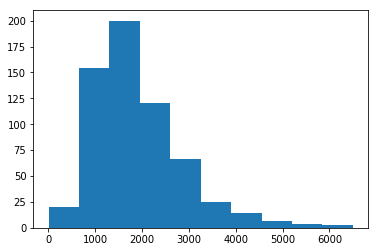

In [8]:
plt.hist(df['Rent'].fillna(df['Rent'].mean()))

(array([517.,  96.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  10. ,  109.4,  208.8,  308.2,  407.6,  507. ,  606.4,  705.8,
         805.2,  904.6, 1004. ]),
 <a list of 10 Patch objects>)

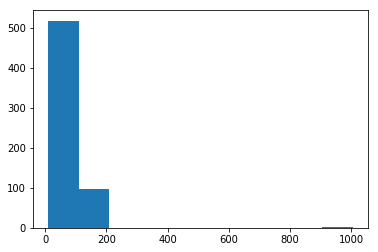

In [9]:
plt.hist(df['SurfaceArea'].fillna(df['SurfaceArea'].mean()))

There exist a huge outlier! 

In [10]:
df.drop(df[df['SurfaceArea'] > 500].index, inplace = True)

(array([ 83.,  62., 103., 196.,  62.,  49.,  19.,  20.,  11.,   8.]),
 array([ 10. ,  28.3,  46.6,  64.9,  83.2, 101.5, 119.8, 138.1, 156.4,
        174.7, 193. ]),
 <a list of 10 Patch objects>)

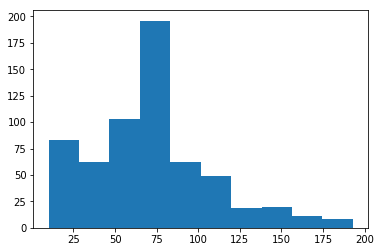

In [11]:
plt.hist(df['SurfaceArea'].fillna(df['SurfaceArea'].mean()))